In this project, I'll work with data from the [CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/), a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

- population - The population as of 2015.
- population_growth - The annual population growth rate, as a percentage.
- area - The total land and water area

You can download the SQLite database, factbook.db, [from this GitHub repo](https://github.com/factbook/factbook.sql/releases).

In this project, I'll use the Python SQLite workflow to explore, analyze, and visualize data from this database.

# Overview of the Data

First things first, let's get familiar with the database.
Use pandas.read_sql_query(sql, con) to handle running the query and returning the results in a table

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

query = "SELECT * FROM sqlite_master WHERE type ='table';"

pd.read_sql_query(query,conn)


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
q = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


Here are the descriptions for some of the columns:

- name - The name of the country.
- area - The total land and sea area of the country.
- population - The country's population.
- population_growth- The country's population growth as a percentage.
- birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
- death_rate - The country's death rate, or the number of death a year per 1,000 people.
- area - The country's total area (both land and water).
- area_land - The country's land area in square kilometers.
- area_water - The country's waterarea in square kilometers.


# Summary Statistics

Let's start by calculating some summary statistics and look for any outlier countries.

In [5]:
q1 ="SELECT MIN(population),MAX(population),MIN(population_growth),MAX(population_growth) FROM facts;"
pd.read_sql_query(q1,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


# Exploring Outliers

- there's a country with no population
- there's a country with more than 7.2 billion people

Let's examine these countries more closely


In [9]:
q2 = """
SELECT name, population
FROM facts
WHERE population = (SELECT MIN(population) FROM facts);
""" 
pd.read_sql_query(q2,conn)

,name,population
0,Antarctica,0


In [10]:
q3 = """
SELECT name,population
FROM facts
WHERE population = (SELECT MAX(population) FROM facts);
""" 
pd.read_sql_query(q3,conn)

,name,population
0,World,7256490011


- Antarctica has a population of zero, which makes sense because No humans live in Antarctica permanently. However, about 1,000 to 5,000 people live through the year at the science stations in Antarctica. Only plants and animals that can live in cold live there. The animals include penguins, seals, nematodes, tardigrades and mites.

- The table contains a row for the population of the whole world, which is over 7.2 billion



# Visualization
Using just the non-outlier rows, generate a 2 by 2 grid of 
histograms. I ll use pd.DataFrame.hist() method to generate histograms for all of the columns.

In [15]:
q4 = """
SELECT population,population_growth,birth_rate,death_rate
FROM facts
WHERE population != (SELECT MIN(population) FROM facts)
AND
population != (SELECT MAX(population) FROM facts);
"""
pd.read_sql_query(q4,conn)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0367aa1978>,
      dtype=object)

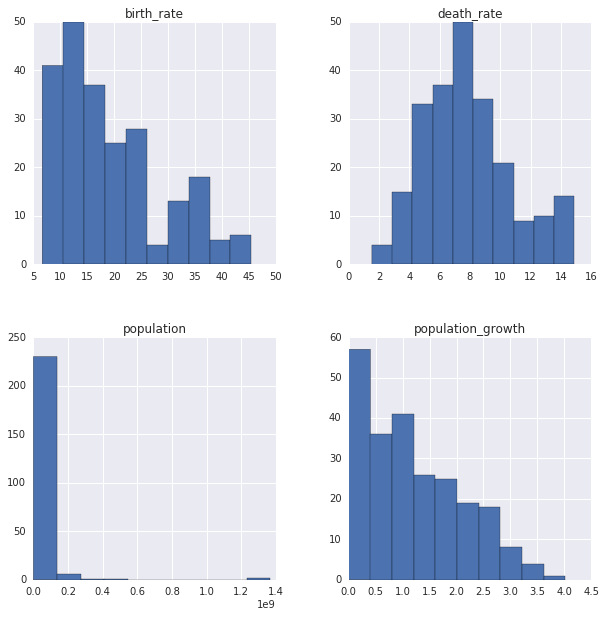

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

pd.read_sql_query(q4,conn).hist(ax=ax)

## Which countries have the highest population density?

Population density is the ratio of population to land area.


In [21]:
q5 = """
SELECT name,(CAST(population as float)/ CAST(area as float)) population_density
FROM facts
WHERE population != (SELECT MIN(population) FROM facts)
AND
population != (SELECT MAX(population) FROM facts)
ORDER BY population_density DESC
LIMIT 30;
"""

pd.read_sql_query(q5,conn)

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


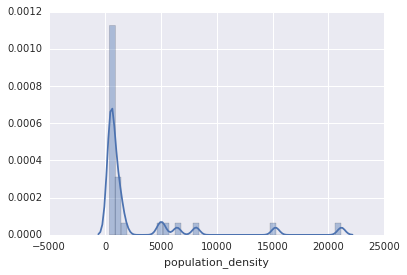

In [22]:
sns.distplot(pd.read_sql_query(q5,conn)['population_density'])
plt.show()
             

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f036760e4e0>]],
      dtype=object)

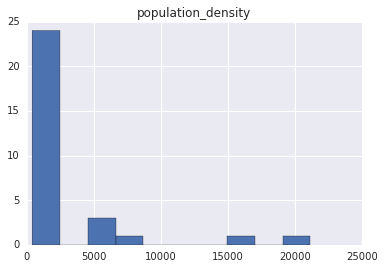

In [23]:
pd.read_sql_query(q5,conn).hist()

## Which countries have the highest ratios of water to land? Which countries have more water than land?


In [24]:
q6 = """
SELECT name, CAST(area_water as float)/CAST(area_land as float) water_to_land, area_water, area_land
FROM facts
WHERE population != (SELECT MIN(population) FROM facts)
AND
population != (SELECT MAX(population) FROM facts)
ORDER BY water_to_land DESC
LIMIT 30;
"""

pd.read_sql_query(q6,conn)

,name,water_to_land,area_water,area_land
0,Virgin Islands,4.520231,1564,346
1,Puerto Rico,0.554791,4921,8870
2,"Bahamas, The",0.386613,3870,10010
3,Guinea-Bissau,0.284673,8005,28120
4,Malawi,0.259396,24404,94080
5,Netherlands,0.225710,7650,33893
6,Uganda,0.222922,43938,197100
7,Eritrea,0.164356,16600,101000
8,Liberia,0.156240,15049,96320
9,Bangladesh,0.140509,18290,130170


In [25]:
q7 = """
SELECT name, area_water, area_land
FROM facts
WHERE area_water > area_land
AND
population != (SELECT MIN(population) FROM facts)
AND
population != (SELECT MAX(population) FROM facts);
"""

pd.read_sql_query(q7,conn)


,name,area_water,area_land
0,Virgin Islands,1564,346


Virgin Islands is the only country with more water than land

# Findings

- The total population of the world is over 7.2 billion
- Antartica do not have any human population but it is considered a country
- The majority of countries have population below 0.2 x 1e9
- Macau has the highest population density in the world
- Virgin Islands is the only country with more water than land